In [2]:
from jmetal.operator import SBXCrossover, PolynomialMutation
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions
from custom_benchmark_problems.diamon_problem.apis.jmetal import Diamond
from custom_benchmark_problems.diamon_problem.data_structures.tree import Tree


dim_space = 3
tree = Tree(dim_space=dim_space)
tree.from_json("experiment_trees/depth.json")
problem = Diamond(
    dim_space=dim_space,
    sequence_info=tree.to_sequence(),
    enable_tracking=False,
)

max_evaluations = 25000

Local Pareto set の計算

NSGA-II

[<jmetal.core.solution.FloatSolution object at 0x7f34070a5de0>, <jmetal.core.solution.FloatSolution object at 0x7f34070a6da0>, <jmetal.core.solution.FloatSolution object at 0x7f34070a5db0>, <jmetal.core.solution.FloatSolution object at 0x7f34070448e0>, <jmetal.core.solution.FloatSolution object at 0x7f34070f0700>, <jmetal.core.solution.FloatSolution object at 0x7f34070a60e0>, <jmetal.core.solution.FloatSolution object at 0x7f34072e0640>, <jmetal.core.solution.FloatSolution object at 0x7f34070a7ca0>, <jmetal.core.solution.FloatSolution object at 0x7f34070a7760>, <jmetal.core.solution.FloatSolution object at 0x7f34070a6440>, <jmetal.core.solution.FloatSolution object at 0x7f34070a7e80>, <jmetal.core.solution.FloatSolution object at 0x7f34070a7be0>, <jmetal.core.solution.FloatSolution object at 0x7f34070a6500>, <jmetal.core.solution.FloatSolution object at 0x7f34070f0af0>, <jmetal.core.solution.FloatSolution object at 0x7f34070a6b00>, <jmetal.core.solution.FloatSolution object at 0x7f3407

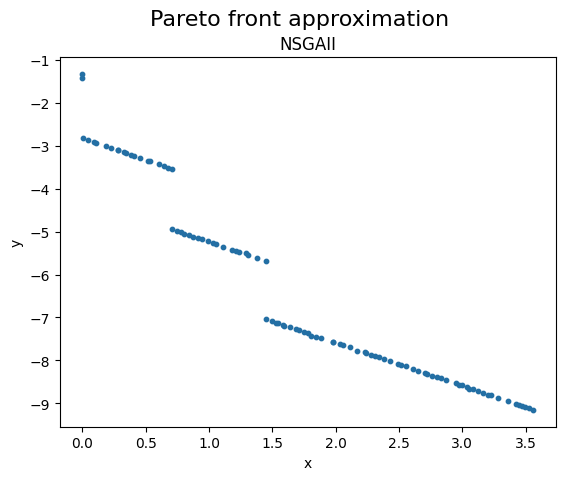

In [4]:
from jmetal.algorithm.multiobjective.nsgaii import NSGAII

algorithm = NSGAII(
    problem=problem,
    population_size=100,
    offspring_population_size=100,
    mutation=PolynomialMutation(
        probability=1.0 / problem.number_of_variables, distribution_index=20
    ),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    termination_criterion=StoppingByEvaluations(max_evaluations),
)

algorithm.run()

solutions = algorithm.get_result()

front = get_non_dominated_solutions(solutions)

plot_front = Plot(title="Pareto front approximation", axis_labels=["x", "y"])
plot_front.plot(front, label="NSGAII")

MOEA/D

In [8]:
from jmetal.algorithm.multiobjective.moead import MOEAD
from jmetal.util.aggregative_function import Tschebycheff

algorithm = MOEAD(
    problem=problem,
    population_size=100,
    mating_pool_size=2,
    mutation=PolynomialMutation(
        probability=1.0 / problem.number_of_variables, distribution_index=20
    ),
    crossover=SBXCrossover(probability=1.0, distribution_index=20),
    aggregative_function=Tschebycheff(dimension=problem.number_of_objectives),
    neighbourhood_selection_probability=0.9,
    max_number_of_replaced_solutions=2,
    neighbor_size=20,
    weight_files_path="resources/MOEAD_weights",
    termination_criterion=StoppingByEvaluations(max_evaluations),
)

algorithm.run()

solutions = algorithm.get_result()

front = get_non_dominated_solutions(solutions)

plot_front = Plot(title="Pareto front approximation", axis_labels=["x", "y"])
plot_front.plot(front, label="MOEAD")

TypeError: MOEAD.__init__() got an unexpected keyword argument 'mating_pool_size'

In [ ]:
tree = Tree(dim_space=exp_config.dimension)  # treeを定義する、dim_spaceはintのｎ次元です
tree.from_json(exp_config.tree_file)  # tree構造ファイルの場所
problem = Diamond(
    dim_space=exp_config.dimension,
    sequence_info=tree.to_sequence(),
    enable_tracking=opts.disable_tracking,
    tracker=tracker,
)  # 問題を定義
algorithm = globals()[Algorithms(exp_config.algorithm).name](
    problem=problem,
    exp_config=exp_config,
    parameters=exp_config.algorithm_parameters,
    termination_criterion=exp_config.termination_criterion,
)  # アルゴリズムを定義、この方法はexp_configから読み込んでですが、cli_main.py#31 の定義方法もできると思います。
algorithm.run()  # アルゴリズムを実行

In [1]:
import json
import numpy as np

# JSONファイルの読み込み
with open("experiment_trees/sample.json", "r") as f:
    data = json.load(f)

# 各ノードのsymbolに対する処理
for node in data["nodes"]:
    symbol = node["symbol"]
    result = np.zeros(len(symbol))

    for i, a_i in enumerate(symbol):
        e_a_i = np.zeros(len(symbol))
        e_a_i[abs(a_i) - 1] = np.sign(a_i)  # a_iの絶対値をインデックスとし、符号に基づいて値を設定
        result += (1 / 4 ** (i + 1)) * e_a_i

    print(f"Node ID: {node['id']}, Result: {result}")

Node ID: 1, Result: [0.25]
Node ID: 2, Result: [ 0.234375 -0.0625    0.      ]
Node ID: 3, Result: [ 0.265625 -0.0625    0.      ]
Node ID: 4, Result: [ 0.25   -0.0625]
